### The objectives of the homework
The purpose of this homework is to build an image recognition system, using transfer learning
and fine-tuning based on pre tuned convolutional neural networks on ImageNet. (http://www.
image-net.org/). I started with https://deeplearningsandbox.com/. With Python you
may use keras pre trained model (see for instance https://keras.io/applications/).

# Exercise 1 - ImageNet
1. what is ImageNet?
2. how many different kinds of cheese can you find in ImageNet?
3. what is the best classifier on ImageNet and what is its error rate?


### Question 1:

ImageNet is a project that generates a large image database that is organized according to the WordNet hierarchy. In this project, images are hand-annotated to indicate which object can be seen on the picture. The 14,197,122 images are divided into 22,000 different categories. Each year, the project hosts a competition for the best image classification model. The Large-Scale Visual Recognition Challenge is done on a subset of ImageNet (100 categories, 1.2 mio training images, 50,000 validation images and 150,000 testing images) The database of annotations of third-party image URLs is freely available directly from ImageNet, though the actual images are not owned by ImageNet.


### Question 2:

If categorical cheeses such as "blue cheese" are subdivided into the different cheeses (e.g. "Roquefort", "Gorgonzola", etc), then we have 37 different kinds of cheese. If we do not do this subdivision, then we 26 different kinds of cheese.

### Question 3:
?????????????????
According to the course, the best classifier made by ML Experts is DPN131 and the best made by AutoML is AmoebaNetB.

ResNet achieved an test error rate of 3,57%, surpassing human error rate (+/- 5%)

# Exercise 2 - What are the best performances reported?

Build an image recognition system for 1000 everyday object categories (ImageNet ILSVRC)
using Keras and TensorFlow1

1. import the relevant modules from keras and the pre trained ResNet502.

In [28]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from PIL import Image

from keras.applications import InceptionV3
from keras.models       import Model

import numpy as np

2. define ResNet50 as you model and check its architecture


In [11]:
model = ResNet50(weights='imagenet')
#model.summary()

ResNet is a short name for Residual Network. As the name of the network indicates, the new terminology that this network introduces is residual learning.

What is the need for Residual Learning?

Deep convolutional neural networks have led to a series of breakthroughs for image classification. Many other visual recognition tasks have also greatly benefited from very deep models. So, over the years there is a trend to go more deeper, to solve more complex tasks and to also increase /improve the classification/recognition accuracy. But, as we go deeper; the training of neural network becomes difficult and also the accuracy starts saturating and then degrades also. Residual Learning tries to solve both these problems.

What is Residual Learning?

In general, in a deep convolutional neural network, several layers are stacked and are trained to the task at hand. The network learns several low/mid/high level features at the end of its layers. In residual learning, instead of trying to learn some features, we try to learn some residual. Residual can be simply understood as subtraction of feature learned from input of that layer. ResNet does this using shortcut connections (directly connecting input of nth layer to some (n+x)th layer. It has proved that training this form of networks is easier than training simple deep convolutional neural networks and also the problem of degrading accuracy is resolved.

This is the fundamental concept of ResNet.
ResNet50 is a 50 layer Residual Network. There are other variants like ResNet101 and ResNet152 also.

In [18]:
img = Image.open("dog.jpg") #english sheepdog

4. reshape the image to fit the input format of your model

In [19]:
target_size = (224, 224)
img = img.resize(target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

5. preprocess the input

In [20]:
x = preprocess_input(x)

6. get the model predictions


In [22]:
preds = model.predict(x)

7. display the top 5 recognized objects. Do you find the one of your image?

In [23]:
decode_predictions(preds, top=5)[0]
#correct with 99% certainty

[('n02105641', 'Old_English_sheepdog', 0.99022573),
 ('n02093647', 'Bedlington_terrier', 0.0072471886),
 ('n02113799', 'standard_poodle', 0.001029094),
 ('n02113712', 'miniature_poodle', 0.0005585555),
 ('n02097474', 'Tibetan_terrier', 0.00020200582)]

# Exercise 3 - Your turn

1. based on your previous work, build a classifier with two classes (only two objects) by
transfer learning and fine tuning.

Tutorial: https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e 

a) choose two classes (cat/dog or muffin/chihuahua or parrot/guacamole or livarot/pont
leveque or whatever/whatever else. . . )

b) download some (say 10 to 50) images of each class on the web split your images into
two sets (training and testing) and setup our data with a training directory and a
validation directory as follows:

c) proceed adapting the code from
https://keras.rstudio.com/articles/applications.html

In [57]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

from keras.applications.inception_v3 import InceptionV3

# 1.1 MobileNet

In a first step, we try to train our model on cats and dogs pictures by transfer learning with MobileNet.

### Step 1 - Import and build model

In [45]:
#imports the mobilenet model and discards the last 1000 neuron layer 
#we only need 2 classes
base_model=MobileNet(weights='imagenet',include_top=False)  

x=base_model.output
x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x=Dense(1024,activation='relu')(x) #dense layer 2
#x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [46]:
#create model based on architecture above:
model=Model(inputs=base_model.input,outputs=preds)

In [70]:
#check architecture:
#for i,layer in enumerate(model.layers):
#  print(i,layer.name)

In [47]:
#We will only be training the last Dense layers that we have made previously
for layer in model.layers:
    layer.trainable=False


### Step 2 - loading and training data

In [53]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator  =train_datagen.flow_from_directory('main_train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory('main_test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 360 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


### Step 3 - train model on data set:

In [43]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model_MobileNet = tmodel.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
13/13 [==============================] - 87s 7s/step - loss: 0.7282 - acc: 0.5063
Epoch 2/10
13/13 [==============================] - 83s 6s/step - loss: 0.7409 - acc: 0.4617
Epoch 3/10
13/13 [==============================] - 85s 7s/step - loss: 0.7356 - acc: 0.4784
Epoch 4/10
13/13 [==============================] - 82s 6s/step - loss: 0.7263 - acc: 0.4887
Epoch 5/10
13/13 [==============================] - 83s 6s/step - loss: 0.7491 - acc: 0.4519
Epoch 6/10
13/13 [==============================] - 79s 6s/step - loss: 0.7305 - acc: 0.4687
Epoch 7/10
13/13 [==============================] - 81s 6s/step - loss: 0.7291 - acc: 0.4944
Epoch 8/10
13/13 [==============================] - 81s 6s/step - loss: 0.7365 - acc: 0.4705
Epoch 9/10
13/13 [==============================] - 83s 6s/step - loss: 0.7334 - acc: 0.4784
Epoch 10/10
13/13 [==============================] - 80s 6s/step - loss: 0.7469 - acc: 0.4409


NameError: name 'history' is not defined

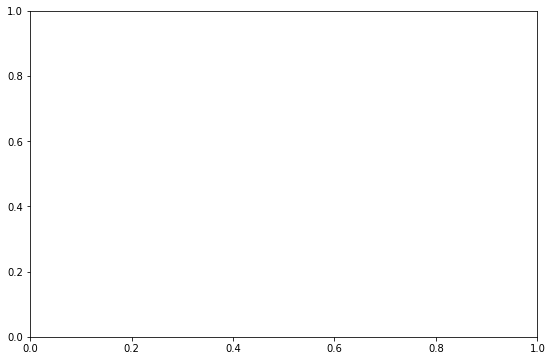

In [44]:
# summarize history for accuracy
plt.figure(figsize=(20, 6))
plt.plot(model_MobileNet.model_MobileNet['acc'])
plt.plot(model_MobileNet.model_MobileNet['val_acc'])
plt.title('model accuracy for MobileNet transfer learning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#for new image:
#model.predict(new_image) 

# 1.2. InceptionV3

In this section, we are trying to do the same as above, but with the famous InceptionV3. Lets see if we can improve the accurcy by just changing the NN model. After this, we are going to fine tune the more efficient model of both, and see if we can further improve the accuracy. 

### Step 1 - Import and build model

In [101]:
# create the base pre-trained model
base_model2 = InceptionV3(weights='imagenet', include_top=False)


In [102]:
#add layers:
x=base_model2.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [103]:
#create model based on architecture above:
model=Model(inputs=base_model2.input,outputs=preds)

In [104]:
#check architecture:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_11
1 conv2d_377
2 batch_normalization_377
3 activation_475
4 conv2d_378
5 batch_normalization_378
6 activation_476
7 conv2d_379
8 batch_normalization_379
9 activation_477
10 max_pooling2d_19
11 conv2d_380
12 batch_normalization_380
13 activation_478
14 conv2d_381
15 batch_normalization_381
16 activation_479
17 max_pooling2d_20
18 conv2d_385
19 batch_normalization_385
20 activation_483
21 conv2d_383
22 conv2d_386
23 batch_normalization_383
24 batch_normalization_386
25 activation_481
26 activation_484
27 average_pooling2d_37
28 conv2d_382
29 conv2d_384
30 conv2d_387
31 conv2d_388
32 batch_normalization_382
33 batch_normalization_384
34 batch_normalization_387
35 batch_normalization_388
36 activation_480
37 activation_482
38 activation_485
39 activation_486
40 mixed0
41 conv2d_392
42 batch_normalization_392
43 activation_490
44 conv2d_390
45 conv2d_393
46 batch_normalization_390
47 batch_normalization_393
48 activation_488
49 activation_491
50 average_pooling2d_38
51 conv2d_389
5

In [105]:
#We will only be training the last Dense layers that we have made previously
for layer in model.layers:
    layer.trainable=False

### Step 2 - loading and training data

In [112]:
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) #included in our dependencies
test_datagen=ImageDataGenerator(rescale=1. / 255)
#eventually turn off random zoom, shear and flip

train_generator  =train_datagen.flow_from_directory('main_train',
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)

validation_generator = test_datagen.flow_from_directory('main_test',
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 360 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


### Step 3 - train model on data set:

In [113]:
#set parameters:
img_width, img_height = 299, 299
nb_train_samples = 360
nb_validation_samples = 60
top_epochs = 5
batch_size = 10
train_dir = 'main_train'
val_dir = 'main_test'

In [114]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
# train the model on the new data for a few epochs
model_InceptionV3 = model.fit_generator(
train_generator,
    steps_per_epoch = nb_train_samples / batch_size,
    epochs = top_epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples / batch_size
)

Epoch 1/5
36/36 [==============================] - 641s 18s/step - loss: 0.7189 - acc: 0.4801 - val_loss: 0.7301 - val_acc: 0.5167
Epoch 2/5
36/36 [==============================] - 596s 17s/step - loss: 0.7164 - acc: 0.5034 - val_loss: 0.7301 - val_acc: 0.5167
Epoch 3/5
36/36 [==============================] - 584s 16s/step - loss: 0.7148 - acc: 0.4939 - val_loss: 0.7301 - val_acc: 0.5167
Epoch 4/5
36/36 [==============================] - 597s 17s/step - loss: 0.7157 - acc: 0.4896 - val_loss: 0.7301 - val_acc: 0.5167
Epoch 5/5
36/36 [==============================] - 609s 17s/step - loss: 0.7235 - acc: 0.4767 - val_loss: 0.7301 - val_acc: 0.5167


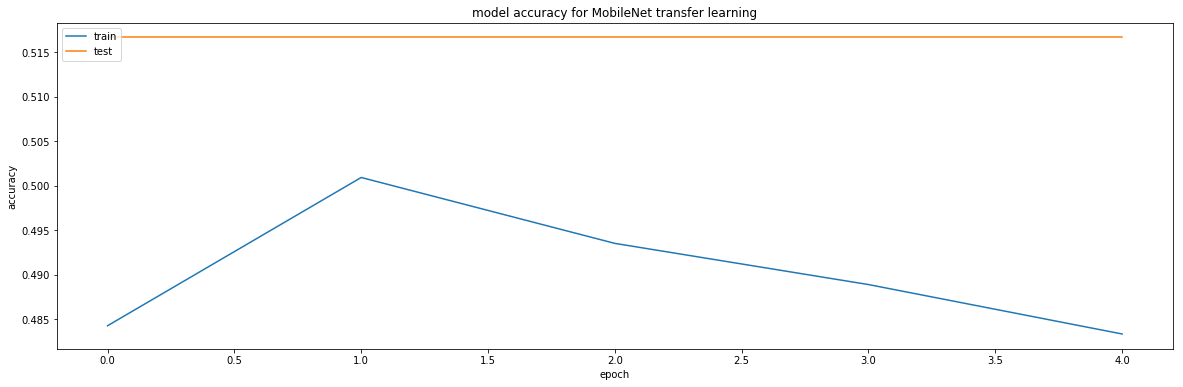

In [115]:
# summarize history for accuracy
plt.figure(figsize=(20, 6))
plt.plot(model_InceptionV3.history['acc'])
plt.plot(model_InceptionV3.history['val_acc'])
plt.title('model accuracy for MobileNet transfer learning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# 2. Fine-Tuning:

In [116]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [117]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics= ['accuracy'])

In [118]:
# train the model on the new data for a few epochs
model_InceptionV3_fine_tuned = model.fit_generator(
train_generator,
    steps_per_epoch = nb_train_samples / batch_size,
    epochs = top_epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples / batch_size
)

Epoch 1/5
36/36 [==============================] - 824s 23s/step - loss: 0.6957 - acc: 0.5112 - val_loss: 0.6629 - val_acc: 0.5667
Epoch 2/5
36/36 [==============================] - 843s 23s/step - loss: 0.6356 - acc: 0.6084 - val_loss: 0.6017 - val_acc: 0.6667
Epoch 3/5
36/36 [==============================] - 733s 20s/step - loss: 0.5781 - acc: 0.7824 - val_loss: 0.5423 - val_acc: 0.8333
Epoch 4/5
36/36 [==============================] - 730s 20s/step - loss: 0.5237 - acc: 0.9065 - val_loss: 0.4834 - val_acc: 1.0000
Epoch 5/5
36/36 [==============================] - 741s 21s/step - loss: 0.4758 - acc: 0.9325 - val_loss: 0.4257 - val_acc: 1.0000


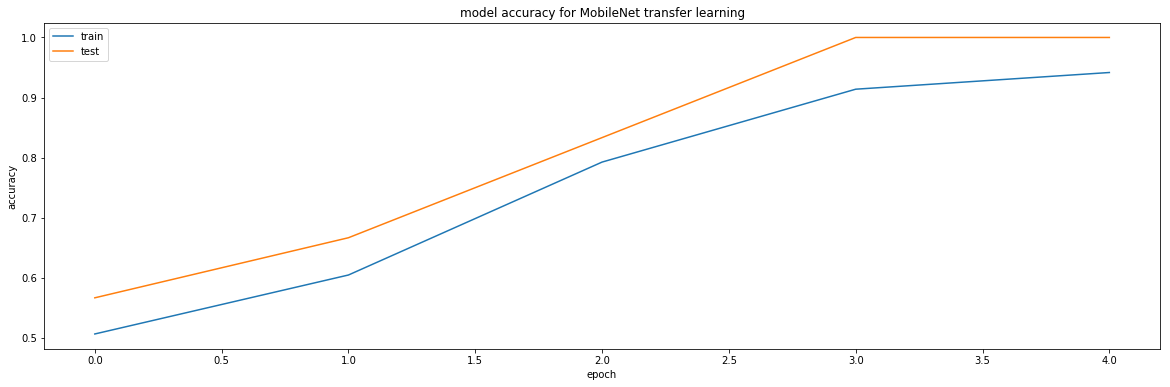

In [119]:
# summarize history for accuracy
plt.figure(figsize=(20, 6))
plt.plot(model_InceptionV3_fine_tuned.history['acc'])
plt.plot(model_InceptionV3_fine_tuned.history['val_acc'])
plt.title('model accuracy for MobileNet transfer learning')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


In [ ]:
#idea: ive good and bad pic of dog/cat and predict!

2. Is it better to do transfer learning and fine tuning or both?

Transfer learning:
    
Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. Transfer learning is an optimization that allows rapid progress or improved performance when modeling the second task. When we consider classifying images, we often opt to build our model from scratch for the best fit, we say. This is an option but building a custom deep learning model demands extensive computation resources and lots of training data. Moreover, there already exists models that perform pretty well in classifying images from various categories. You have probably heard of ImageNet, and its Large Visual Recognition Challenge. In this Computer Vision challenge, models try to classify a huge collection of images into 1000 classes, like “Zebra”, “Dalmatian”, and “Dishwasher”. Inception V3 is the model Google Brain Team has built for the same. Needless to say, the model performed very well. Transfer learning -  It may not be as efficient as a full training from scratch, but is surprisingly effective for many applications. It allows model creation with significantly reduced training data and time by modifying existing rich deep learning models. The reason our final layer retraining can work on new classes is that it turns out the kind of information needed to distinguish between all the 1000 classes in ImageNet is often also useful to distinguish between new kinds of objects.


Fine-Tuning:

Fine tuning on the other hand is just about making some fine adjustments to further improve performance. For example, during transfer learning, you can unfreeze the pre-trained model and let it adapt more to the task at hand.